# Overview of Today's class

And now let's move to the main part of the class. The plan for today is to work on Sentiment Analysis. As usual, we will first focus a bit on the theory, and then apply what we have learnt through some exercises. Here is an overview of the programme:
> * Part 1: __Introduction to Sentiment Analysis__
> * Part 2: __Dictionary-based methods__
> * Part 3: __Wordshifts__
> * Part 4: __Project Assignment__

# Part 1: Intro to Sentiment Analysis

Let's start with a short introduction to sentiment analysis. You will learn what is sentiment analysis, what we use it for, and what are the main methods for sentiment analysis. 

 
> **Video lecture**: [Intro to Sentiment Analysis](https://www.youtube.com/watch?v=QXfE0Dxb_0c&ab_channel=LauraAlessandretti)

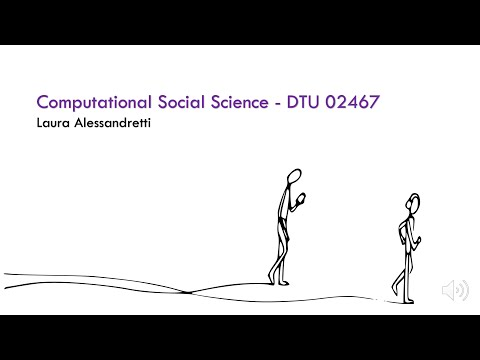

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("QXfE0Dxb_0c",width=800, height=450)

And now let's continue with some reading. I suggest you to have a look at the paper below, where the authors show how they build the labMT dictionary for sentiment analysis and used it to study Twitter data. There is __no need for you to read it all__. Just read through the abstracts, have a look at the figures, and get a sense for the methodology.
> **Reading**: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752)

Don't forget to have a look at the interactive [Hedonometer](http://hedonometer.org/), which is built using the method described in the paper.

> _Exercise 1: Exploring the LabMT dataset_ 
>    1. Download the labMT dictionary from [here](https://hedonometer.org/words/labMT-en-v2). 
>    2. Explain in your own words __how it was collected__. You can find the information [in the original paper, section 2.2](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752)
>    3. Explore the labMT data. 
        * What are the top 10 words by happiness score, and the bottom 10? Does this surprise you?
        * What are the top 20 controversial words (those for which annotators' ratings disagree the most)? Why do you think they are controversial?
        * Plot the histogram showing words sentiment according to the labMT data. Do you notice anything that you find surprising? Does the labMT data support the _"Pollyanna hypothesis"_ in psychology? And how? [This article](https://www.pnas.org/content/112/8/2389) is a good starting point to read about the Pollyanna hypothesis.
>    4. Using the labMT data, create a function that, given a document (list of tokens), returns the corresponding "Happiness Score" (see equation 1 in the article). Words that do not exist in the labMT dataset can be ignored.

The vocabulary was constructed from a bunch of corpora on the internet: Twitter, music lyrics and google books.

These words were then rated by Mechanical turks such that each person rated 100 words at random. Each word got 50 independent evaluations, each evaluation was on an integer scale from 1 to 9.

In [109]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
from datetime import datetime

In [70]:
data = pd.read_csv(os.getcwd() + '/Hedonometer.csv')

In [71]:
print("Top 10 words are \n", data['Word'][:10])
print()
print("Bottom 10 words are \n", data['Word'][-9:])
print()
print("Most controversial words \n",
      data.nlargest(20, 'Standard Deviation of Ratings')[['Word', 'Standard Deviation of Ratings']])

Top 10 words are 
 0     laughter
1    happiness
2         love
3        happy
4      laughed
5        laugh
6     laughing
7    excellent
8       laughs
9          joy
Name: Word, dtype: object

Bottom 10 words are 
 10178             ncov19
10179           outbreak
10180           pandemic
10181         quarantine
10182        quarantined
10183          sanitizer
10184    self-quarantine
10185         ventilator
10186        ventilators
Name: Word, dtype: object

Most controversial words 
                Word  Standard Deviation of Ratings
8389        fucking                           2.93
9211         fuckin                           2.74
9417         fucked                           2.71
7990          pussy                           2.67
3768        whiskey                           2.64
9410           slut                           2.63
9600     cigarettes                           2.60
8991           fuck                           2.58
8748      mortality                         

[]

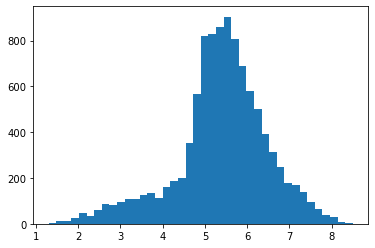

In [72]:
# Plot Histogram

xs = data['Happiness Score']

plt.hist(xs, bins=40)
plt.plot()

In [73]:
dic = data.set_index('Word')

def get_happiness_score(text):
    happiness = 0
    #text = text.spit()
    for word in text:
        happiness += dic.loc[word]['Happiness Score']
    happiness = happiness/len(text)

# Part 2:  Dictionary-based methods.

The goal for this part of the class is to use the labMT data for studying happiness over time on _r/wallstreetbets_, building on dictionary-based methods. We will re-use some of the code from last week. So, make sure you have it at hand.

> _Exercise 2: Dictionary-based method to study sentiment on r/wallstreetbets_ 


>    1. Open the _wallstreetbets submissions dataframe_ we used in Week 6 (my version is [here](https://github.com/lalessan/comsocsci2021/blob/master/data/wallstreet_subs.csv.gz)).
>    2. Tokenize the _text_ of each submission (use the code you created in Week 6, exercise 3, point 2). Add it in a new column of your dataframe called "tokens".
>    3. Create one document per day in the dataset, containing all tokens for that day. Plot the length of the document (number of tokens) over time. Are documents long enough for using a dictionary-based method? As a rule-of-thumb  that 10,000 words are enough to score with a sentiment dictionary confidently ([Source here](https://epjdatascience.springeropen.com/articles/10.1140/epjds/s13688-017-0121-9)).
>    4. Plot the average daily happiness on r/wallstreetbets using the function you created in step 3 (remember the video lesson in Week 2, for plotting nice time-series).
>    5. Compare happiness on _r/wallstreetbets_ to happiness on Twitter using the [hedonometer](http://hedonometer.org/timeseries/en_all/?from=2019-09-16&to=2021-03-15). What is (approximatively) the average value of the two time-series? How do you explain any difference between the two?
>    6. Download the daily Close price of the [S&P 500 Index](https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC) and plot it over time. This index measures the stock performance of 500 large companies listed on stock exchanges in the United States, you can read more about it in the [S&P 500 Wikipedia page](https://en.wikipedia.org/wiki/S%26P_500).
>    7. Compare the figures you created in steps 8. and 10. What do you observe? 
>    8. Discuss the limitations of your analysis. 

In [75]:
current_dir = os.getcwd()
gme_data = pd.read_csv(current_dir + '/data/wallstreet_subs.csv')
gme_data['text'] =  gme_data['title'] + " " +  gme_data['selftext'] 
stock_tickers = pd.read_csv(current_dir + '/data/nasdaq_screener_1646818494779.csv')

In [106]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

tokenized = []
# This runs in O(1) time
stop_words = set(stopwords.words('english'))
for sub in tqdm(gme_data['text']):
    tokens = word_tokenize(sub.lower())
    tokens = [i for i in tokens if  i not in stop_words
          and re.match('^[a-z]+$', i)]

    tokenized.append(tokens)

gme_data['tokenized'] = tokenized

100%|███████████████████████████████████| 82242/82242 [01:09<00:00, 1178.10it/s]


In [124]:
gme_data['created_utc']

date_created = []
for time in tqdm(gme_data['created_utc']):
    date_created.append(datetime.utcfromtimestamp(time).strftime('%Y-%m-%d'))
    
gme_data['date_created'] = date_created

100%|█████████████████████████████████| 82242/82242 [00:00<00:00, 464891.93it/s]


# Part 3: Word Shifts

Dictionary-based methods give us a way to measure the sentiment polarity for a given document. But which words contribute the most to make a document more sad/happy than another? We will now dig into _'Word Shifts'_, a method for understanding which words contribute to increasing or decreasing polarity.

Start by looking at the video below, where Peter Dodds, one of the authors of the Hedonometer, shows what are __Words Shift__ and how to use them.
> **Video**: [Word Shifts by Peter Dodds](https://www.youtube.com/watch?v=Z0M2k8TQ-t8&ab_channel=PeterSheridanDodds)

Now, have a look at the video lecture below, where I show how to plot WordShifts in Python. If you watch it carefullly, you will nail the next exercise ;)
> **Video Lecture**: [Word Shifts in Python](https://youtu.be/UIv5Aluo-xI)

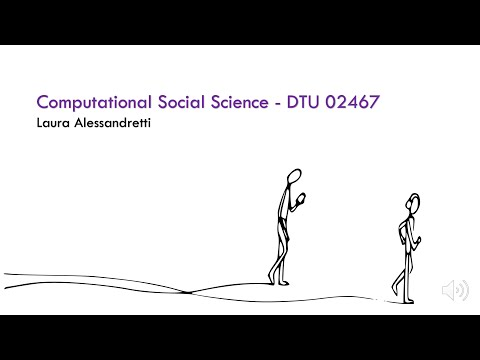

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("UIv5Aluo-xI",width=800, height=450)

_Exercise 3: Creating Word Shifts_
>    1. Pick a day of your choice in 2020. We call it $d$. It is more interesting if you pick a day where you expect something relevant to occur (e.g. Christmas, New Year, Corona starting, the market crashes...).
>    2. Build two lists $l$ and $l_{ref}$ containing all tokens for submissions posted on r/wallstreebets on day $d$, and in the 7 days preceding day $d$, respectively. 
>    3. For each token $i$, compute the relative frequency in the two lists $l$ and $l_{ref}$. We call them $p(i,l)$ and $p(i,l_{ref})$, respectively. The relative frequency is computed as the number of times a token occurs over the total length of the document. Store the result in a dictionary.
>    4. For each token $i$, compute the difference in relative frequency $\delta p(i) = p(i,l) - p(i,l_{ref})$. Store the values in a dictionary. Print the top 10 tokens (those with largest relative frequency). Do you notice anything interesting?
>    5. Now, for each token, compute the happiness $h(i) = labMT(i) - 5$, using the labMT dictionary. Here, we subtract $5$, so that positive tokens will have a positive value and negative tokens will have a negative value. Then, compute the product $\delta \Phi = h(i)\cdot \delta p(i)$. Store the results in a dictionary. 
>    6. Print the top 10 tokens, ordered by the absolute value of $|\delta \Phi|$. Explain in your own words the meaning of $\delta \Phi$. If that is unclear, have a look at [this page](https://shifterator.readthedocs.io/en/latest/cookbook/weighted_avg_shifts.html).
>    7. Now install the [``shifterator``](https://shifterator.readthedocs.io/en/latest/installation.html) Python package. We will use it for plotting Word Shifts. 
>    8. Use the function ``shifterator.WeightedAvgShift`` to plot the WordShift, showing which words contributed the most to make your day of choice _d_ happier or more sad then days in the preceding 7 days. Comment on the figure. 
>    9. How do words that you printed in step 6 relate to those shown by the WordShift? 

# Part 4: Let's start thinking about the project assignment

In a few weeks, you will start working on your project assignment. Here is just a short exercise for you guys to start thinking about it. 

 _Exercise 4: A Study Project in Computational Social Science._
> 1. Read the [Project Assignment](https://github.com/lalessan/comsocsci2022/wiki/Project-Assignment) page, where I explain how to set up a Study Project.
> 2. Think of a topic of interest to your would like to study using data downloaded from the Web (Wikipedia, Twitter, Reddit, Facebook, Github, other data sources...), and some of the methods we have seen in this course. 
> 3. What is the topic? 
> 4. What is the data? 
> 5. Write down 3 research questions related to your topic that you would like to investigate.
> 6. Put together 1 slide including the answers to points 3,4,5.

